<a href="https://colab.research.google.com/github/orin00/colab/blob/main/240314_%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

분류모델 중에 의사 결정 나무로 iris 식물 분류하는 코드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.tree import DecisionTreeClassifier
# 학습된 데이터 외의 데이터로 기출변형 해주는 거
from sklearn.model_selection import train_test_split
# iris 라는 식물 품종분류 데이터 셋
from sklearn.datasets import load_iris

# 모델 불러오기(의사결정나무)
dt_clf = DecisionTreeClassifier()

# 데이터 셋 불러오기(iris)
iris_data = load_iris()

# 학습 데이터와 테스트 데이터 분리하기
# random_state는 데이터를 섞어서 꺼내는데 고정된 값에서 꺼내줌 -> 내가 실행할 때마다 값이 변하면 안되므로 고정시켜줌
(X_train, X_test, y_train, y_test) = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=13)

In [12]:
# 모델 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [13]:
dt_clf.predict(X_test)

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2,
       2])

In [14]:
y_test

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2,
       2])

In [15]:
df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [17]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot",
                class_names = iris_data.target_names,
                feature_names = iris_data.feature_names,
                impurity=True,
                filled=True)

In [19]:
# 생성된 tree.dot 시각화
!pip install graphviz

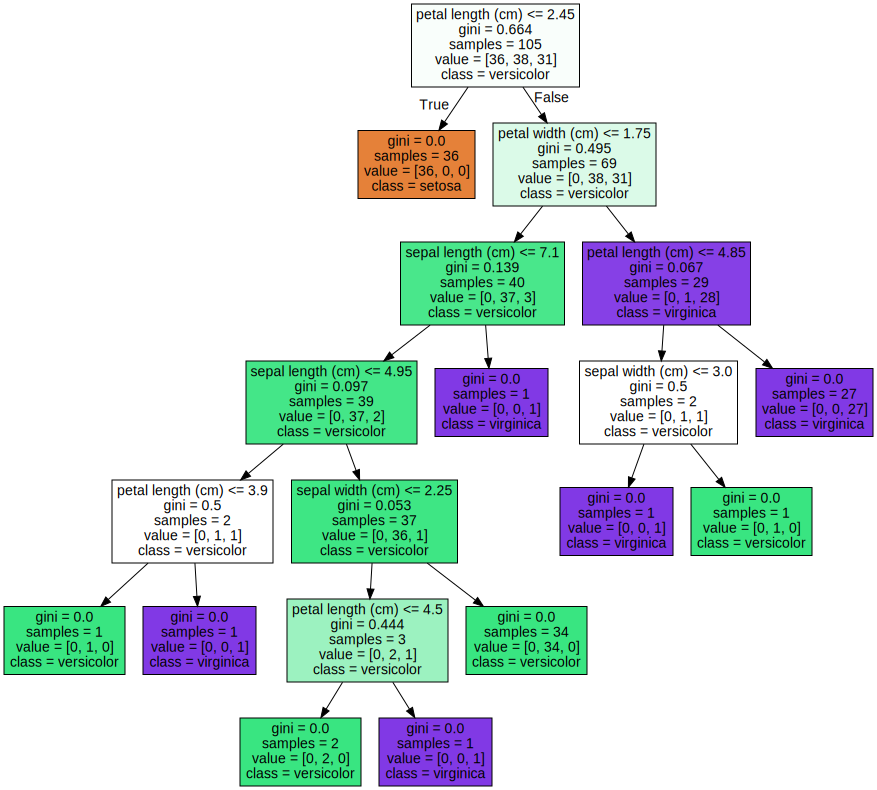

In [20]:
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)
# 루트 노드를 보면 gini가 0.664가 나오는데 3등분으로 나눠져 있다는 뜻
# samples가 105개, petal length (cm) <= 2.45는 나눠지는 규칙(특성)이 된다.
# setosa는 36 개 샘플 전부다 들어갔으므로 리프 노드다.
# 무조건 어딘가에 속해야 하는데 분기가 많으면 조건이 까다로워서 원하는 곳에 속하지 않을 수 있음.=> 과적합, 오버피팅
# 조건이 너무 러프하면 아무나 다 속할 수 있기 때문에 이것도 안 좋음 => 과소적합
# 길이가 깊어질수록 과적합이 되어서 좋지 않음

펭귄 분류

In [22]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [27]:
# 펭귄 분류 모델 만들기
df = sns.load_dataset('penguins')

In [28]:
# 데이터 전처리
# 널 값 처리
# 널값확인
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [31]:
## 널값 전부 삭제
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [34]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [35]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [36]:
df['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [37]:
# 수치형 데이터와 범주형 데이터 분리
df_cat = df[['species', 'island', 'sex']]
df_num = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

In [40]:
# 문자형태 데이터 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
col_names = ['species', 'island', 'sex']
cat_data = {}

for i in col_names:
  result = encoder.fit_transform(df[i])
  cat_data[i] = result

cat_data

{'species': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2

In [42]:
df_cat = pd.DataFrame(cat_data)
df_cat

,species,island,sex
0,0,2,1
1,0,2,0
2,0,2,0
3,0,2,0
4,0,2,1
...,...,...,...
328,2,0,0
329,2,0,0
330,2,0,1
331,2,0,0


In [43]:
# 수치형 데이터 scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_num)

In [44]:
df_num = pd.DataFrame(scaled_data, columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

In [45]:
df_num

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
3,0.167273,0.738095,0.355932,0.208333
4,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...
328,0.549091,0.071429,0.711864,0.618056
329,0.534545,0.142857,0.728814,0.597222
330,0.665455,0.309524,0.847458,0.847222
331,0.476364,0.202381,0.677966,0.694444


In [50]:
# 두 데이터 합치기 및 X, y 만들기
df_total = pd.concat([df_cat, df_num], axis=1)
X = df_total.iloc[:,1:]
y = df_total.iloc[:,0]

In [66]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.4, random_state=3)

In [67]:
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 모델 불러오기
pg_clf = DecisionTreeClassifier(random_state=0)

# 의사결정나무 모델 학습
pg_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [68]:
pred = pg_clf.predict(X_test)
dic = {'예측값' : pred,
       '실제값' : y_test}
result_df = pd.DataFrame(dic)
result_df

,예측값,실제값
118,0,0
153,1,1
301,2,2
15,0,0
84,0,0
...,...,...
331,2,2
323,2,2
43,0,0
201,1,1


In [69]:
diff = []

for i in range(len(result_df)):
  if result_df.iloc[i,0] == result_df.iloc[i,1]:
    diff.append(True)
  else:
    diff.append(False)

In [70]:
diff

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [71]:
result_df['채점'] = diff
result_df['채점'].sum()

128

In [81]:
# Accuracy(정확도)
# 정확도가 분류 모델의 평가 지표가 된다.
result_df['채점'].sum()/len(result_df)

0.9552238805970149

In [82]:
np.unique(df['species'])

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [84]:
df.columns[1:]

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [114]:
# 샘플 갯수가 12개 이상이어야 분기가 가능해짐
# pg_clf = DecisionTreeClassifier(min_samples_split=12)

In [118]:
# 말단 노드가 되기위한 최소한의 샘플 수를 지정
# pg_clf = DecisionTreeClassifier(min_samples_leaf=12)

In [216]:
# 트리의 최대 깊이를 지정하는 방법, 정지 규칙 적용
pg_clf = DecisionTreeClassifier(max_depth=3)

In [217]:
pg_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [218]:
from sklearn.tree import export_graphviz

export_graphviz(pg_clf, out_file="penguins.dot",
                class_names = np.unique(df['species']),
                feature_names = df.columns[1:],
                impurity=True,
                filled=True)

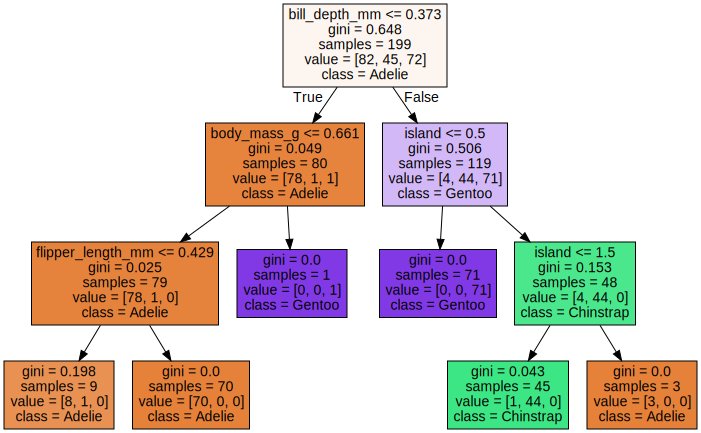

In [219]:
f = open('penguins.dot')
graphviz.Source(f.read())

In [220]:
f.close()

k-Nearest Neighbors

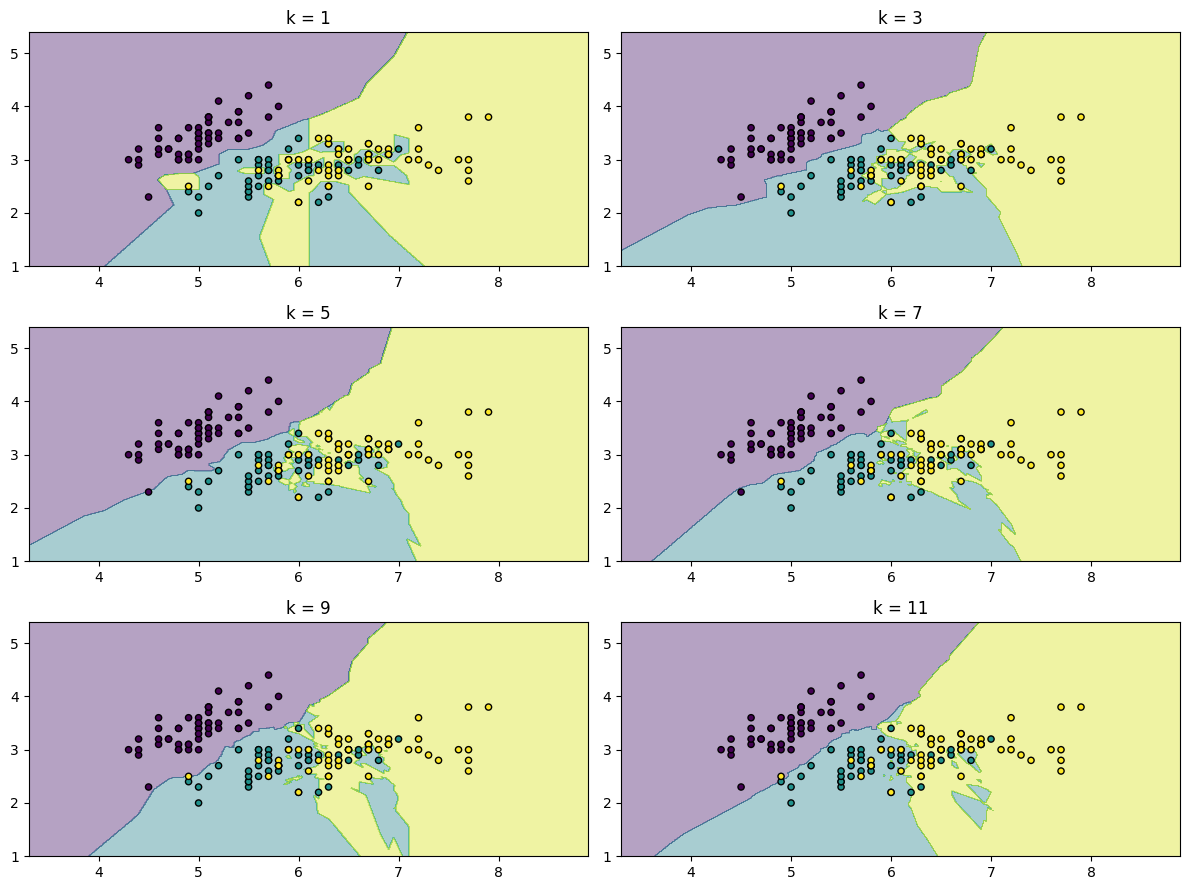

In [221]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 붓꽃 데이터 로드
iris_data = load_iris()
X = iris_data.data[:, :2]  # 시각화를 위해 첫 두 개의 특성만 사용
y = iris_data.target

# 시각화용 메쉬그리드 생성
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# 다양한 k 값에 대해 반복
k_values = [1, 3, 5, 7, 9, 11]

plt.figure(figsize=(12, 9))

for i, k in enumerate(k_values, 1):
    plt.subplot(3, 2, i)

    # k-Nearest Neighbors 분류기 생성 및 학습
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X, y)

    # 메쉬그리드의 각 점에 대한 예측
    Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 그리기
    plt.contourf(xx, yy, Z, alpha=0.4)

    # 학습 데이터 포인트 플롯
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
    plt.title(f"k = {k}")

plt.tight_layout()
plt.show()

펭귄 KNN으로 나타내고 평가

In [190]:
from sklearn.neighbors import KNeighborsClassifier

pg_knn = KNeighborsClassifier(n_neighbors=27)
pg_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=27)

In [191]:
pg_knn.predict(X_test)

array([0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0,
       2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 0, 1,
       2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0,
       1, 2, 0, 0, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0,
       1, 0, 2, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0,
       1, 2])

In [192]:
def make_df(X_test, y_test, pg_clf):
  pred = pg_clf.predict(X_test)
  dic = {'예측값' : pred, '실제값' : y_test}
  result_df = pd.DataFrame(dic)
  return result_df

def check_values(result_df):
  diff = []
  for i in range(len(result_df)):
    if result_df.iloc[i,0] == result_df.iloc[i,1]:
      diff.append(True)
    else:
      diff.append(False)
  result_df['diff'] = diff

  return result_df

In [193]:
result_df = make_df(X_test, y_test, pg_knn)
result_df = check_values(result_df)
result_df

,예측값,실제값,diff
118,0,0,True
153,1,1,True
301,2,2,True
15,0,0,True
84,0,0,True
...,...,...,...
331,2,2,True
323,2,2,True
43,0,0,True
201,1,1,True


In [194]:
# KNN 평가
result_df['diff'].sum()

123

팽귄 분류모델 평가

In [197]:
from sklearn.metrics import classification_report

In [196]:
print(classification_report(result_df['실제값'], result_df['예측값']))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        64
           1       0.92      1.00      0.96        23
           2       0.84      1.00      0.91        47

    accuracy                           0.92       134
   macro avg       0.92      0.94      0.93       134
weighted avg       0.93      0.92      0.92       134



In [198]:
def print_metrics(result_df):
  print(classification_report(result_df['실제값'], result_df['예측값']))

In [213]:
pg_dcl = DecisionTreeClassifier(max_depth=3)
pg_dcl.fit(X_train, y_train)
pg_knn = KNeighborsClassifier(n_neighbors=20)
pg_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [214]:
dtm = make_df(X_test, y_test, pg_dcl)
knn = make_df(X_test, y_test, pg_knn)

print_metrics(dtm)
print_metrics(knn)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        64
           1       0.96      1.00      0.98        23
           2       0.94      1.00      0.97        47

    accuracy                           0.97       134
   macro avg       0.97      0.98      0.97       134
weighted avg       0.97      0.97      0.97       134

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        64
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        47

    accuracy                           1.00       134
   macro avg       1.00      1.00      1.00       134
weighted avg       1.00      1.00      1.00       134



붓꽃 분류모델 평가

In [261]:
(X_train, X_test, y_train, y_test) = train_test_split(iris_data.data, iris_data.target,
                                                     test_size=0.3,
                                                     random_state=3)

In [262]:
iris_dcl = DecisionTreeClassifier(max_depth=5)
iris_dcl.fit(X_train, y_train)
iris_knn = KNeighborsClassifier(n_neighbors=9)
iris_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [266]:
dtm = make_df(X_test, y_test, iris_dcl)
print_metrics(dtm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.93      0.93        14
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [264]:
knn = make_df(X_test, y_test, iris_knn)
print_metrics(knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



타이타닉 호

In [267]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [274]:
X = df[['pclass','fare','embarked','class','alone','age','sex']]
y = df[['survived']]

In [277]:
X.isnull().sum()

pclass        0
fare          0
embarked      2
class         0
alone         0
age         177
sex           0
dtype: int64

In [278]:
X.dropna(inplace=True)

<ipython-input-278-32f8c2353909>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [279]:
X.isnull().sum()

pclass      0
fare        0
embarked    0
class       0
alone       0
age         0
sex         0
dtype: int64

In [280]:
y = y.loc[X.index]

In [281]:
X.shape, y.shape

((712, 7), (712, 1))

In [282]:
X_cat = pd.get_dummies(X)
X_cat

,pclass,fare,alone,age,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,sex_female,sex_male
0,3,7.2500,False,22.0,0,0,1,0,0,1,0,1
1,1,71.2833,False,38.0,1,0,0,1,0,0,1,0
2,3,7.9250,True,26.0,0,0,1,0,0,1,1,0
3,1,53.1000,False,35.0,0,0,1,1,0,0,1,0
4,3,8.0500,True,35.0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,3,29.1250,False,39.0,0,1,0,0,0,1,1,0
886,2,13.0000,True,27.0,0,0,1,0,1,0,0,1
887,1,30.0000,True,19.0,0,0,1,1,0,0,1,0
889,1,30.0000,True,26.0,1,0,0,1,0,0,0,1


In [293]:
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [310]:
(X_train, X_test, y_train, y_test) = train_test_split(X_cat, y['survived'],# y를 시리즈로 넣어야 함
                                                      test_size=0.3,
                                                      random_state=5)

In [311]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(498, 12) (214, 12)
(498,) (214,)


In [312]:
tit_dtm = DecisionTreeClassifier(min_samples_split=10)
tit_dtm.fit(X_train, y_train)
tit_knn = KNeighborsClassifier(n_neighbors=9)
tit_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [313]:
dtm = make_df(X_test, y_test, tit_dtm)
knn = make_df(X_test, y_test, tit_knn)

print_metrics(dtm)
print_metrics(knn)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       136
           1       0.72      0.59      0.65        78

    accuracy                           0.77       214
   macro avg       0.75      0.73      0.74       214
weighted avg       0.76      0.77      0.76       214

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       136
           1       0.63      0.60      0.61        78

    accuracy                           0.72       214
   macro avg       0.70      0.70      0.70       214
weighted avg       0.72      0.72      0.72       214

